In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('subway.csv', encoding='cp949')

In [10]:
df.head(4)

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202004,9호선2~3단계,언주,184170,16729,185046,16460,20200503
1,202004,2호선,합정,680012,48502,732794,48049,20200503
2,202004,2호선,을지로3가,399344,51720,403589,50877,20200503
3,202004,2호선,강변(동서울터미널),676082,83345,673317,81844,20200503


In [12]:
df.tail(2)

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
43685,201501,6호선,증산,244352,226314,65797,64899,20150206
43686,201501,4호선,숙대입구,426269,421753,59564,56862,20150206


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43687 entries, 0 to 43686
Data columns (total 8 columns):
사용월       43687 non-null int64
호선명       43687 non-null object
지하철역      43687 non-null object
유임승차인원    43687 non-null int64
무임승차인원    43687 non-null int64
유임하차인원    43687 non-null int64
무임하차인원    43687 non-null int64
작업일자      43687 non-null int64
dtypes: int64(6), object(2)
memory usage: 2.7+ MB


In [5]:
df = df.iloc[:,0:7]

In [6]:
df.describe()

,사용월,유임승차인원,무임승차인원,유임하차인원,무임하차인원
count,43687.000000,4.368700e+04,4.368700e+04,4.368700e+04,43687.000000
mean,201761.626731,3.223193e+05,9.152366e+04,2.896130e+05,59129.101220
std,150.055995,3.405387e+05,1.609923e+05,3.342782e+05,51669.050165
min,201501.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,201610.000000,1.051235e+05,2.587500e+04,7.583850e+04,23969.500000
50%,201803.000000,2.264530e+05,5.131600e+04,1.880560e+05,45494.000000
75%,201906.000000,4.155295e+05,9.259800e+04,3.807930e+05,76523.500000
max,202004.000000,3.266271e+06,3.353256e+06,3.265282e+06,400607.000000


In [75]:
df = df.drop_duplicates(['사용월','호선명','지하철역','유임승차인원','무임승차인원','유임하차인원','무임하차인원'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35404 entries, 0 to 43686
Data columns (total 7 columns):
사용월       35404 non-null int64
호선명       35404 non-null object
지하철역      35404 non-null object
유임승차인원    35404 non-null int64
무임승차인원    35404 non-null int64
유임하차인원    35404 non-null int64
무임하차인원    35404 non-null int64
dtypes: int64(5), object(2)
memory usage: 2.2+ MB


In [78]:
col_list = ['유임승차인원','무임승차인원','유임하차인원','무임하차인원']
df[col_list] = df[col_list]/10000

In [79]:
df['유임승하차인원'] = df['유임승차인원']+df['유임하차인원']
df['무임승하차인원'] = df['무임승차인원']+df['무임하차인원']
df['총승하차인원'] = df['유임승차인원'] + df['무임승차인원']+df['유임하차인원'] + df['무임하차인원']
df['유임승하차율'] = df['유임승하차인원']/df['총승하차인원']
df['무임승하차율'] = df['무임승하차인원']/df['총승하차인원']

In [80]:
df['연도'] = df['사용월'].astype(str).str[:4]
df['월'] = df['사용월'].astype(str).str[4:]
df['연도'] = df['연도'].astype('category')
df['월'] = df['월'].astype('category')

In [81]:
df.head(2)

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,유임승하차인원,무임승하차인원,총승하차인원,유임승하차율,무임승하차율,연도,월
0,202004,9호선2~3단계,언주,18.4170,1.6729,18.5046,1.6460,36.9216,3.3189,40.2405,0.917523,0.082477,2020,04
1,202004,2호선,합정,68.0012,4.8502,73.2794,4.8049,141.2806,9.6551,150.9357,0.936032,0.063968,2020,04


In [82]:
df.loc[df['호선명'] == '9호선2~3단계','호선명'] = '9호선'
df.loc[df['호선명'] == '9호선2단계','호선명'] = '9호선'

In [83]:
sub1 = df[df['호선명'] == '1호선']
sub2 = df[df['호선명'] == '2호선']
sub3 = df[df['호선명'] == '3호선']
sub4 = df[df['호선명'] == '4호선']
sub5 = df[df['호선명'] == '5호선']
sub6 = df[df['호선명'] == '6호선']
sub7 = df[df['호선명'] == '7호선']
sub8 = df[df['호선명'] == '8호선']
sub9 = df[df['호선명'] == '9호선']

df = pd.concat([sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,sub9])

In [85]:
df['호선명'] = df["호선명"].astype('category')
df['지하철역'] = df['지하철역'].astype('category')

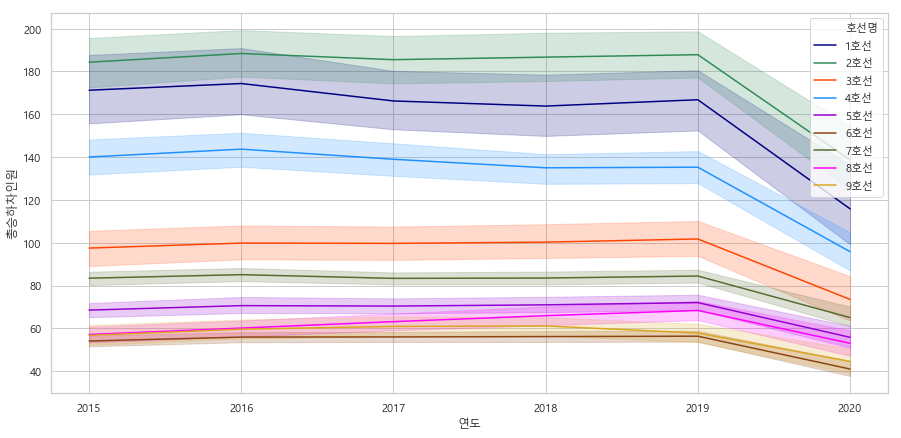

In [129]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,7))
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

sns.lineplot(x='연도', y="총승하차인원", hue='호선명', palette=pal,data=df)

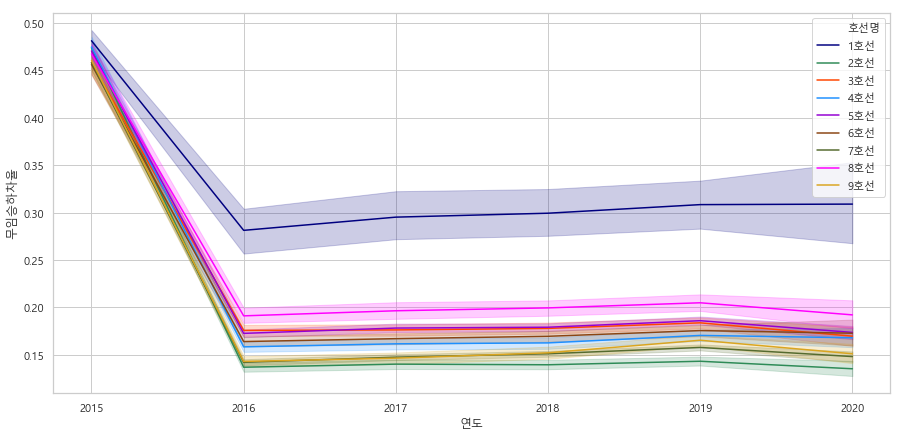

In [130]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,7))
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

sns.lineplot(x='연도', y="무임승하차율", hue='호선명', palette=pal,data=df)

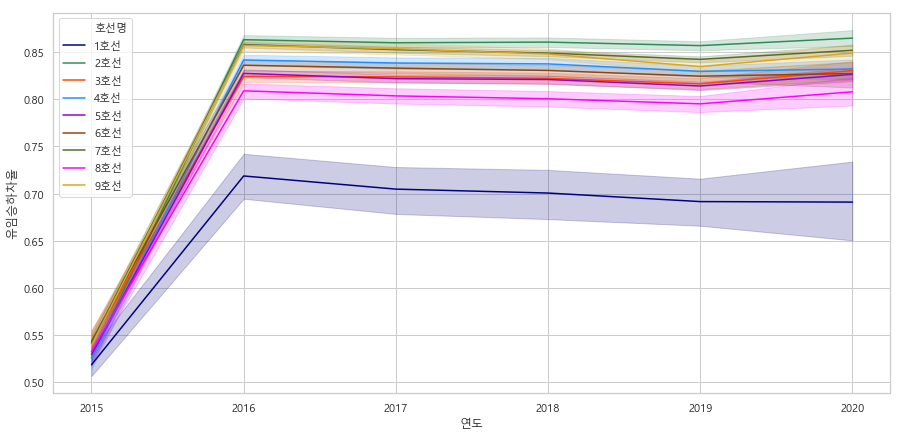

In [132]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,7))
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']

sns.lineplot(x='연도', y="유임승하차율", hue='호선명', palette=pal,data=df)

In [105]:
df.head(2)

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,유임승하차인원,무임승하차인원,총승하차인원,유임승하차율,무임승하차율,연도,월
589,202004,1호선,서울역,77.5859,13.9595,74.8330,13.0554,152.4189,27.0149,179.4338,0.849444,0.150556,2020,04
590,202004,1호선,종각,70.6082,9.6784,68.7093,9.0826,139.3175,18.7610,158.0785,0.881318,0.118682,2020,04


In [133]:
df1 = df.groupby('호선명').get_group('1호선')
df2 = df.groupby('호선명').get_group('2호선')
df3 = df.groupby('호선명').get_group('3호선')
df4 = df.groupby('호선명').get_group('4호선')
df5 = df.groupby('호선명').get_group('5호선')
df6 = df.groupby('호선명').get_group('6호선')
df7 = df.groupby('호선명').get_group('7호선')
df8 = df.groupby('호선명').get_group('8호선')
df9 = df.groupby('호선명').get_group('9호선')

DF = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9]).reset_index(drop=True)
DF.head(2)

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,유임승하차인원,무임승하차인원,총승하차인원,유임승하차율,무임승하차율,연도,월
0,202004,1호선,서울역,77.5859,13.9595,74.8330,13.0554,152.4189,27.0149,179.4338,0.849444,0.150556,2020,04
1,202004,1호선,종각,70.6082,9.6784,68.7093,9.0826,139.3175,18.7610,158.0785,0.881318,0.118682,2020,04


In [154]:
pivot1 = pd.pivot_table(index=['연도'],columns=['호선명'],values=['총승하차인원','무임승하차인원'],aggfunc='count',data=DF)
pivot1.head()

무임승하차인원                                         총승하차인원                 \
호선명      1호선  2호선  3호선  4호선  5호선  6호선  7호선  8호선  9호선    1호선  2호선  3호선  4호선   
연도                                                                           
2015     120  600  408  312  612  456  612  204  350    120  600  408  312   
2016     120  600  408  312  612  456  612  204  360    120  600  408  312   
2017     120  600  408  312  612  456  612  204  360    120  600  408  312   
2018     120  600  408  312  612  456  612  204  368    120  600  408  312   
2019     120  600  408  312  612  457  612  204  456    120  600  408  312   

                               
호선명   5호선  6호선  7호선  8호선  9호선  
연도                             
2015  612  456  612  204  350  
2016  612  456  612  204  360  
2017  612  456  612  204  360  
2018  612  456  612  204  368  
2019  612  457  612  204  456

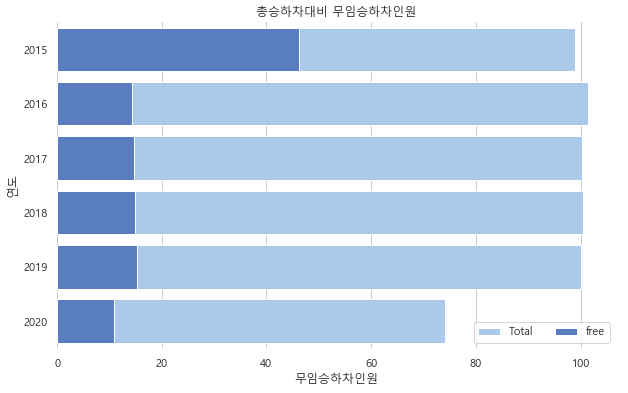

In [180]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes("pastel")
sns.barplot(x="총승하차인원", y='연도', data=DF, label="Total", color="b",ci=False)
sort = df.sort_values("총승하차인원", ascending=False)
sns.set_color_codes("muted")
sns.barplot(x="무임승하차인원", y="연도", data=sort, label="free", color="b", ci=False)
plt.title("총승하차대비 무임승하차인원")

ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

Text(0, 0.5, '')

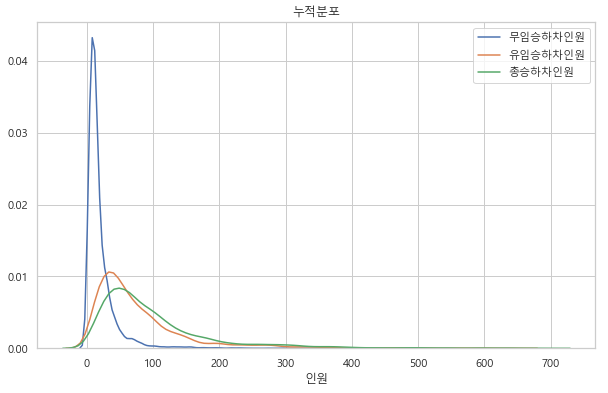

In [192]:
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(DF['무임승하차인원'],hist=False, label="무임승하차인원")
sns.distplot(DF['유임승하차인원'],hist=False, label="유임승하차인원")
sns.distplot(DF['총승하차인원'],hist=False, label="총승하차인원")

ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set_title('누적분포')
ax.set_xlabel("인원")
ax.set_ylabel("")

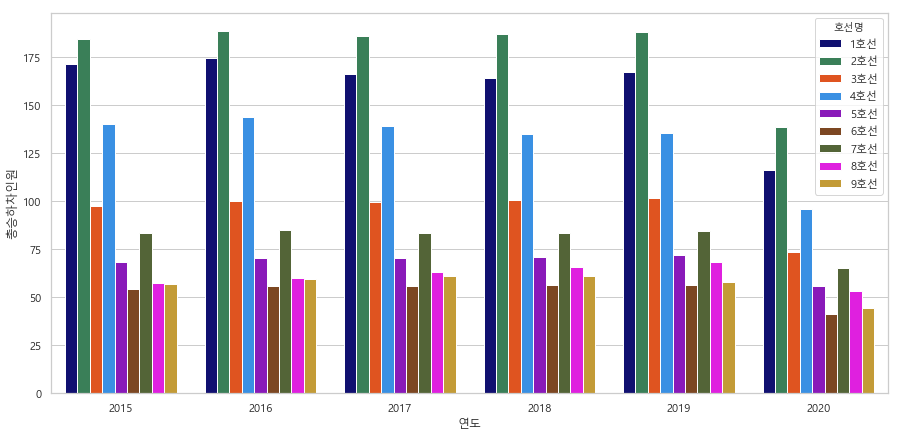

In [158]:
plt.rcParams['font.family'] = 'Malgun Gothic'
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']
plt.figure(figsize=(15,7))
sns.barplot(x='연도', y='총승하차인원', hue='호선명',data = DF, palette=pal,ci=False)

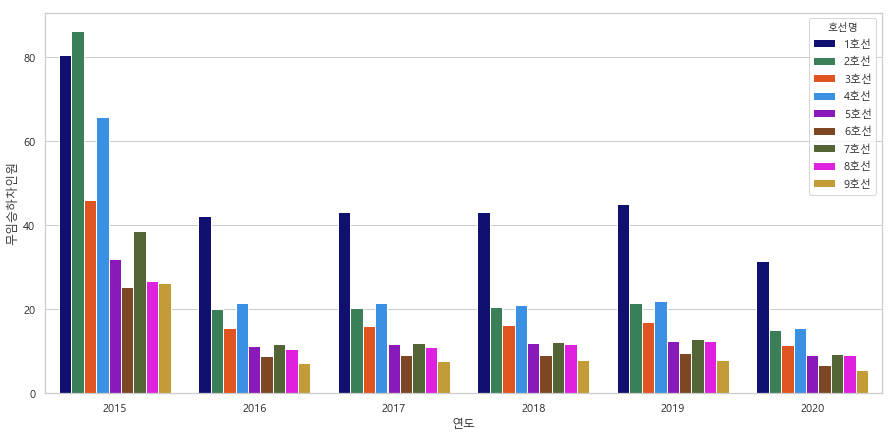

In [159]:
plt.rcParams['font.family'] = 'Malgun Gothic'
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']
plt.figure(figsize=(15,7))
sns.barplot(x='연도', y='무임승하차인원', hue='호선명',data = DF, palette=pal,ci=False)

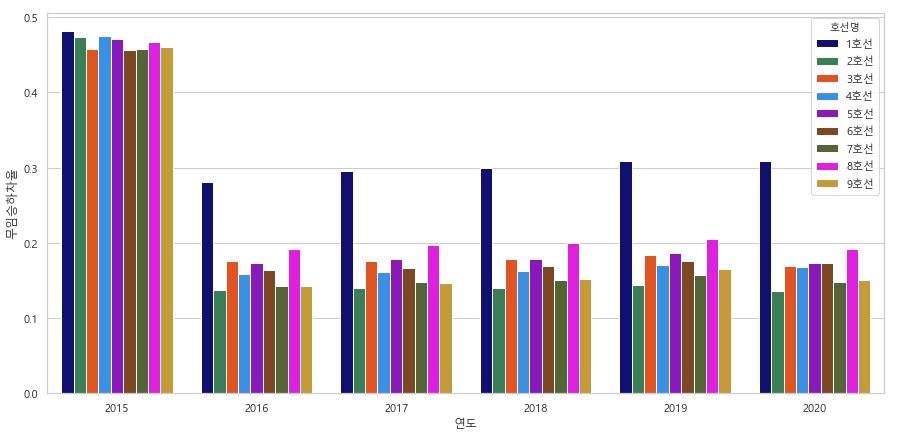

In [160]:
plt.rcParams['font.family'] = 'Malgun Gothic'
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']
plt.figure(figsize=(15,7))
sns.barplot(x='연도', y='무임승하차율', hue='호선명',data = DF, palette=pal,ci=False)

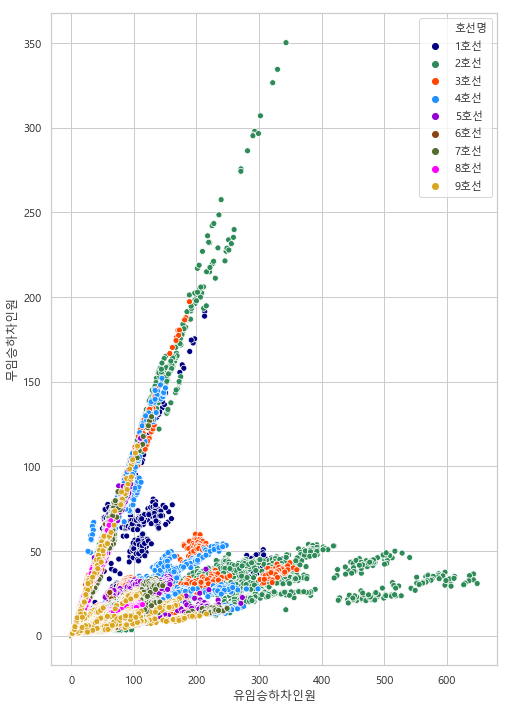

In [136]:
plt.figure(figsize=(8,12))
pal = ['navy','seagreen','orangered','dodgerblue','darkviolet','saddlebrown','darkolivegreen','magenta','goldenrod']
sns.scatterplot(x="유임승하차인원",y='무임승하차인원',hue='호선명',palette=pal,data=DF)

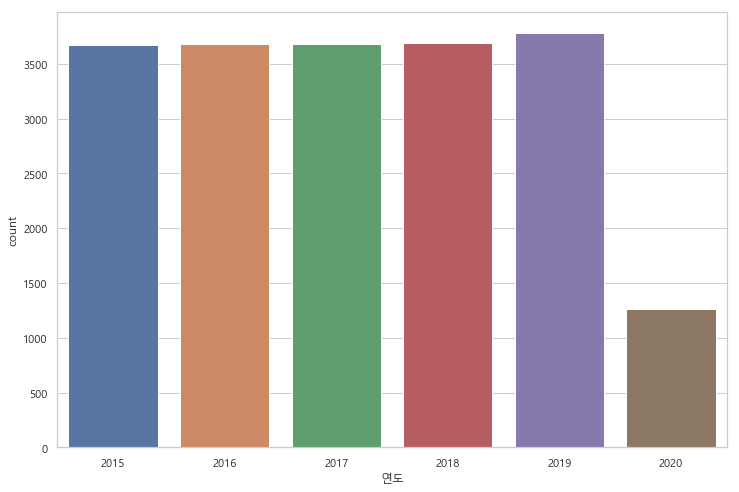

In [162]:
plt.figure(figsize=(12,8))
sns.countplot(x="연도",data = df)

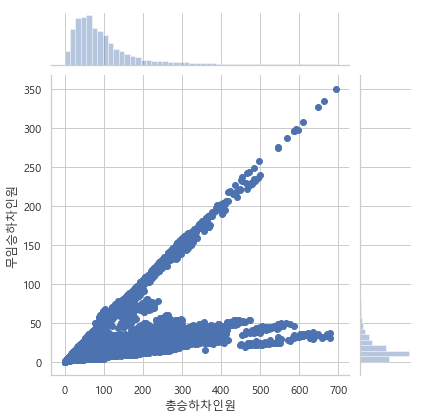

In [126]:
sns.jointplot(x="총승하차인원", y="무임승하차인원", data = df, kind='scatter')

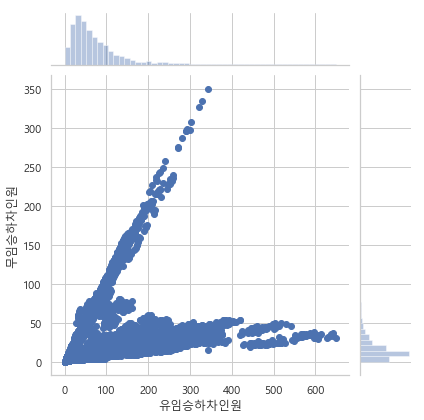

In [123]:
sns.jointplot(x="유임승하차인원", y="무임승하차인원", data = df, kind='scatter')

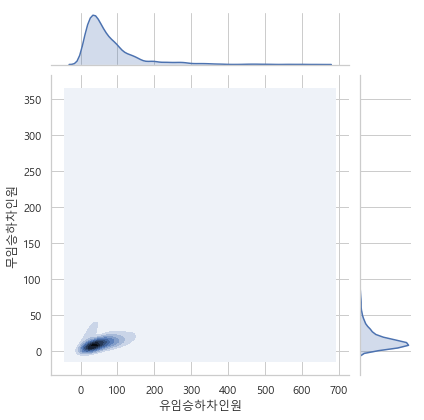

In [124]:
sns.jointplot(x="유임승하차인원", y="무임승하차인원", data = df, kind='kde')

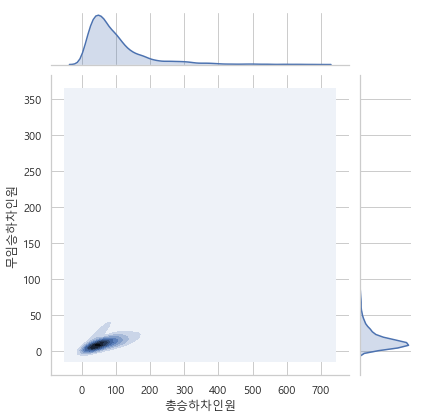

In [127]:
sns.jointplot(x="총승하차인원", y="무임승하차인원", data = df, kind='kde')